In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.remove('/global/homes/d/dorislee/.local/lib/python2.7/site-packages/yt-3.2.dev0-py2.7-linux-x86_64.egg')
sys.path.remove('/global/homes/d/dorislee/.local/lib/python2.7/site-packages')
sys.path.append('/global/homes/d/dorislee/mypythonpackages')
import yt
yt.funcs.mylog.setLevel(50) #coerce output null
# import plot_is

In [4]:
cp ../Larson_is/plot_is.py .

In [5]:
import plot_is

In [7]:
cd ~/ramses/trunk/ramses/bin/

/global/u2/d/dorislee/ramses/trunk/ramses/bin


fc.nml

Setup the customed radius and boxsize

This is according to Foster and Chevalier's $\xi$ = 0 to $\xi=100$ as expected there is a large unnecessarily empty grid . For the cloud $\xi$ =  6.451


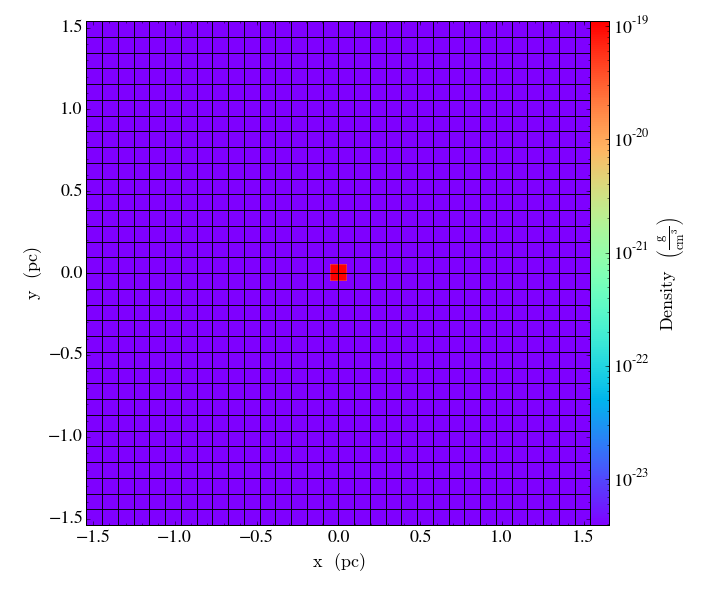

In [22]:
plot_is.plot_time_slice("density",1)

level 6 always gives you a 32x32 grid

So I changed this back to a more reasonable boxsize of 10 


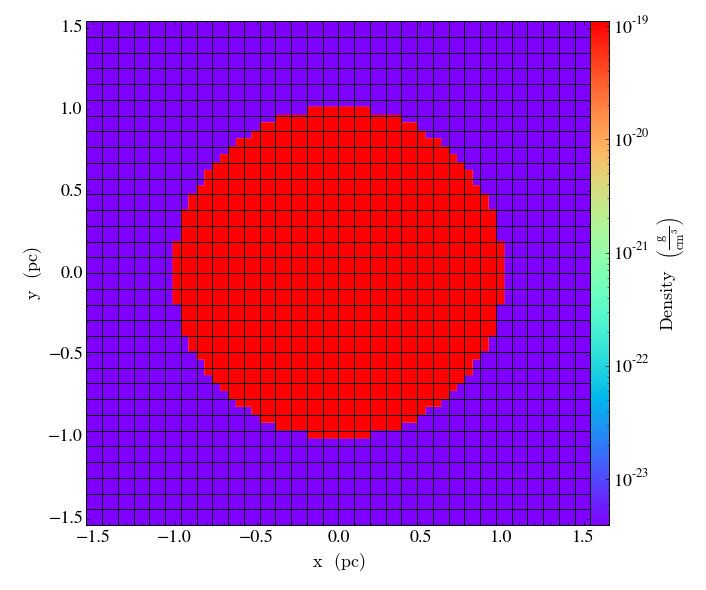

In [24]:
plot_is.plot_time_slice("density",1)

Also, boxsize is not in code units, but some weird thing, because cloud radius is 12 code units but box is 10 here, and it still fits 

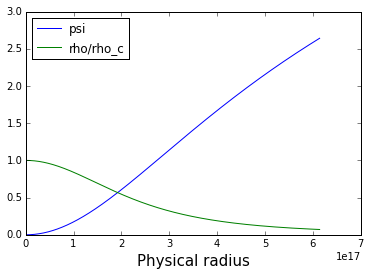

In [100]:
xi_max = 6.451
from scipy import integrate
def solvr(Y, t):
    return [Y[1], exp(-Y[0])-2/t*Y[1]]
xi = np.arange(1e-6, xi_max, 0.01) #start at small poisitive number to avoid div-by-0
asol = integrate.odeint(solvr, [0, 0], xi)
rho = np.exp(-asol[:,0]) #rho/rho_c
r = xi/1.05e-17 #[cm]
plt.plot(r,asol[:,0],label ='psi')#$\psi$' )
plt.plot(r,rho,label ='rho/rho_c')#$\rho$')
plt.xlabel("Physical radius",fontsize=15)
from matplotlib.legend_handler import HandlerLine2D
plt.legend(loc='upper left',prop={'size':12},numpoints=1)

In [46]:
6e17/32

1.875e+16

In [84]:
rho.shape

(646,)

In [85]:
646/32

20

In [90]:
r = 3.5
dr = 0.01
x = 3.5/dr


350.0


In [104]:
rho.shape

(646,)

In [108]:
rho[370]

0.24115046398993539

In [166]:
rho_c = 0.02806 #[1.1e-19 from Larson's paper in code units]
N = 16
xmax=16
ymax=16
img = np.zeros((xmax,ymax))
for x in np.linspace(-1.0*(img.shape[0]-1)/2.,(img.shape[0]-1)/2.,N):
    for y in np.linspace(-1.0*(img.shape[1]-1)/2.,(img.shape[1]-1)/2.,N):
        r = np.sqrt(x**2+y**2)
        theta = np.arctan(y/x) 
        if (r<xi_max):
#             rho_i=5
            dr = 0.01
            xi = int(r/dr)
            #print r,xi
            rho_i =rho[xi]*rho_c
            #print r, xi,rho_i
        else:
            rho_i = 1.0e-6
        img[x+xmax/2][y+ymax/2]=rho_i

<matplotlib.colorbar.Colorbar instance at 0x2b1e6da193f8>

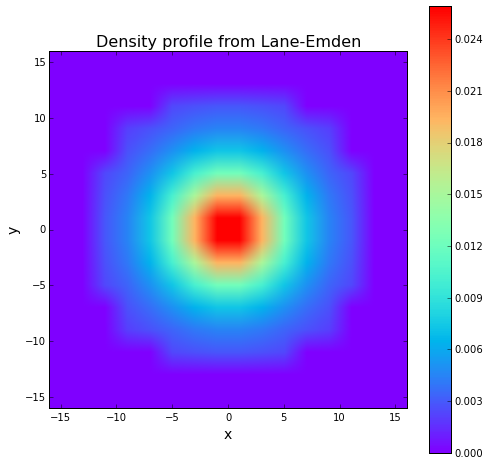

In [167]:
#from matplotlib.colors import LogNorm
plt.figure(figsize=(8,8))
im = plt.imshow(img,cmap="rainbow")#,norm=LogNorm())#,origin="lower")
im.set_extent([-xmax,xmax,-ymax,ymax])
plt.title("Density profile from Lane-Emden".format(q),fontsize=16)
plt.xlabel("x",fontsize=14)
plt.ylabel("y",fontsize=14)
plt.colorbar()

In [159]:
img

array([[  1.00000000e-06,   1.00000000e-06,   1.00000000e-06, ...,
          1.00000000e-06,   1.00000000e-06,   1.00000000e-06],
       [  1.00000000e-06,   1.00000000e-06,   1.00000000e-06, ...,
          1.00000000e-06,   1.00000000e-06,   1.00000000e-06],
       [  1.00000000e-06,   1.00000000e-06,   1.00000000e-06, ...,
          1.00000000e-06,   1.00000000e-06,   1.00000000e-06],
       ..., 
       [  1.00000000e-06,   1.00000000e-06,   1.00000000e-06, ...,
          1.00000000e-06,   1.00000000e-06,   1.00000000e-06],
       [  1.00000000e-06,   1.00000000e-06,   1.00000000e-06, ...,
          1.00000000e-06,   1.00000000e-06,   1.00000000e-06],
       [  1.00000000e-06,   1.00000000e-06,   1.00000000e-06, ...,
          1.00000000e-06,   1.00000000e-06,   1.00000000e-06]])